# Santiment Research Kit Demo

This notebook demonstrates how to use the Santiment Research Kit (`sanpy`) to fetch and visualize various crypto metrics. This is designed to help quantitative clients get familiar with the data available.

We will cover:
1. **Financial Data** (Price/Volume)
2. **On-Chain Metrics** (Daily Active Addresses)
3. **Social Metrics** (Social Volume)
4. **Development Activity**
5. **Correlation Analysis** (Price vs. Metric)

In [17]:
import san
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
san.ApiConfig.api_key = "your_api_key"

## 1. Price Data Visualization
Let's fetch the daily price of **Bitcoin** (USD) for the last 6 months to visualize the trend.

Fetching price data for bitcoin...
                                  value
datetime                               
2024-12-01 00:00:00+00:00  97335.487063
2024-12-02 00:00:00+00:00  95851.264608
2024-12-03 00:00:00+00:00  96005.584003
2024-12-04 00:00:00+00:00  98799.387267
2024-12-05 00:00:00+00:00  97078.975372


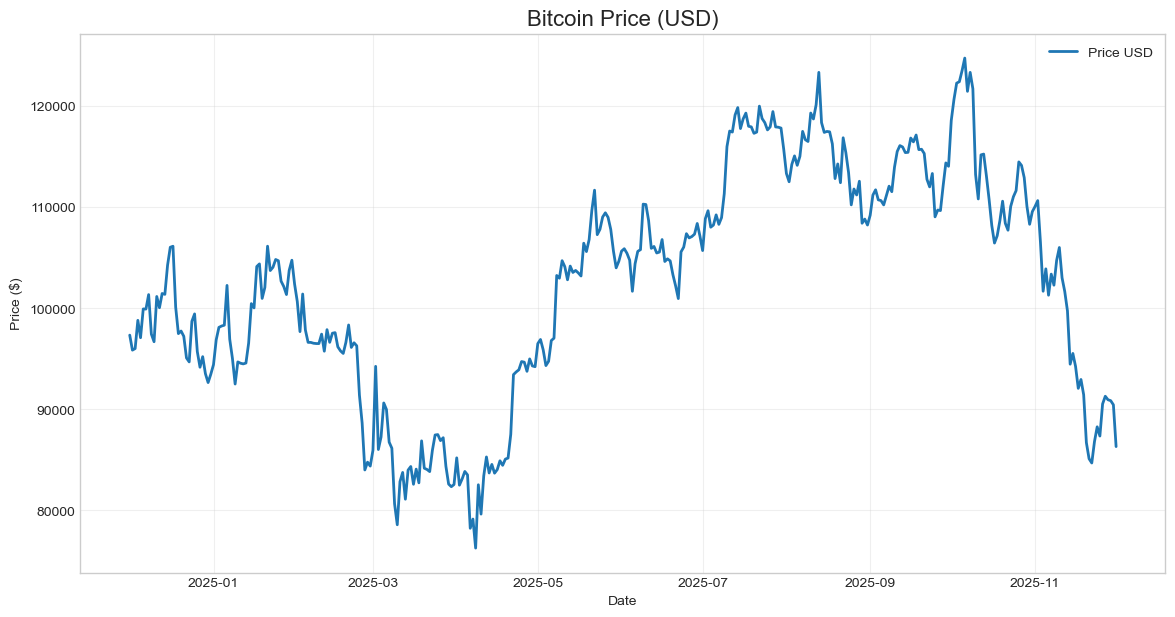

In [19]:
slug = 'bitcoin'
from_date = '2024-12-01'
to_date = '2025-12-01'

print(f"Fetching price data for {slug}...")
df_price = san.get(
    "price_usd",
    slug=slug,
    from_date=from_date,
    to_date=to_date,
    interval="1d"
)

print(df_price.head())

plt.figure()
plt.plot(df_price.index, df_price.values, label='Price USD', linewidth=2)
plt.title(f'{slug.capitalize()} Price (USD)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. On-Chain Metrics: Daily Active Addresses
Daily Active Addresses (DAA) is a key metric for understanding network health and adoption. Let's look at **Ethereum**.

Fetching DAA for ethereum...


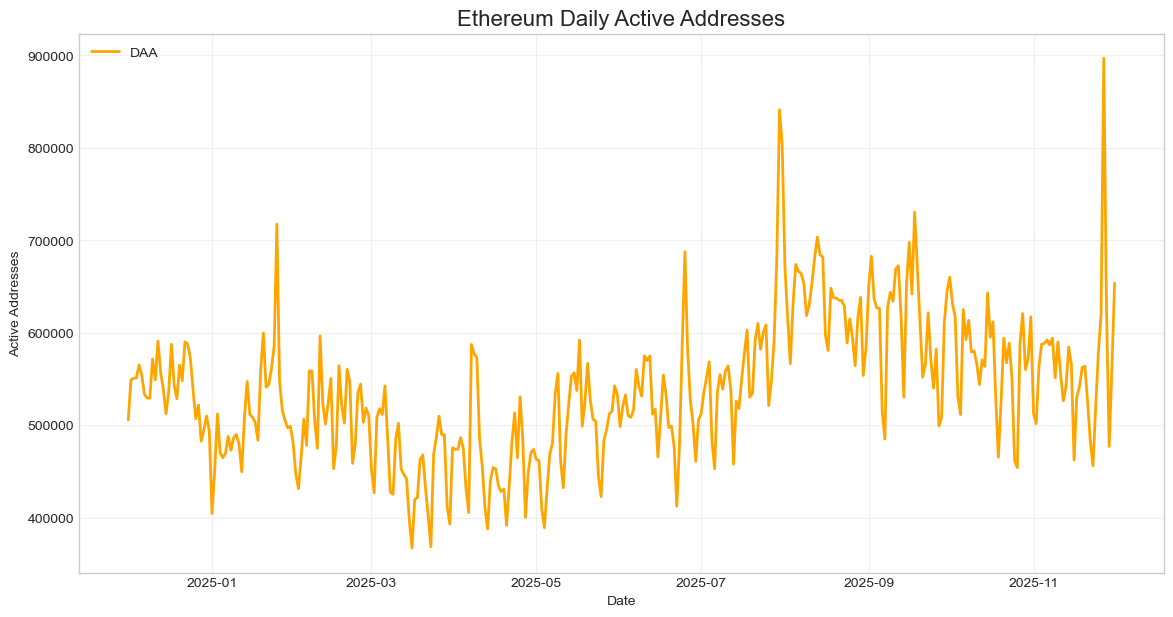

In [20]:
slug_eth = 'ethereum'

print(f"Fetching DAA for {slug_eth}...")
df_daa = san.get(
    "daily_active_addresses",
    slug=slug_eth,
    from_date=from_date,
    to_date=to_date,
    interval="1d"
)

plt.figure()
plt.plot(df_daa.index, df_daa.values, color='orange', label='DAA', linewidth=2)
plt.title(f'{slug_eth.capitalize()} Daily Active Addresses', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Active Addresses')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3. Social Metrics: Social Volume
Social Volume tracks the number of mentions of the asset across Telegram, Reddit, Twitter, etc. Spikes often correlate with price volatility.

Fetching Social Volume for solana...


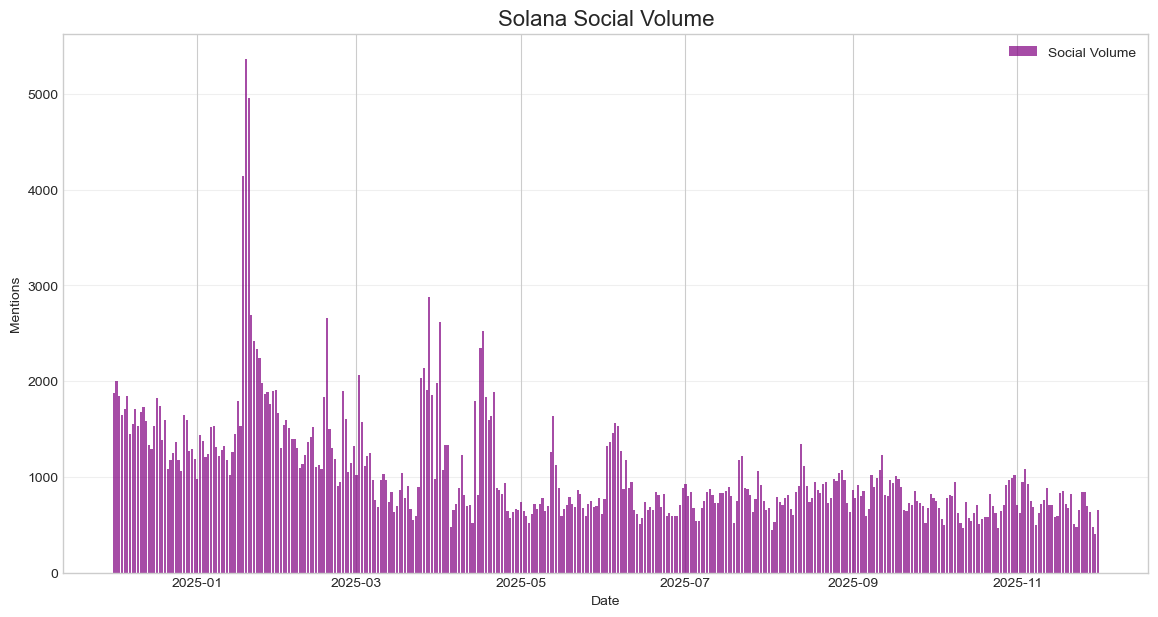

In [21]:
slug_sol = 'solana'

print(f"Fetching Social Volume for {slug_sol}...")
df_social = san.get(
    "social_volume_total",
    slug=slug_sol,
    from_date=from_date,
    to_date=to_date,
    interval="1d"
)
plt.figure()
plt.bar(df_social.index, df_social['value'], color='purple', label='Social Volume', alpha=0.7)
plt.title(f'{slug_sol.capitalize()} Social Volume', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Mentions')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.show()

## 4. Developer Activity
This metric tracks high-level development activity on the project's public GitHub repositories. **Cardano** is often cited for high dev activity.

Fetching Dev Activity for cardano...


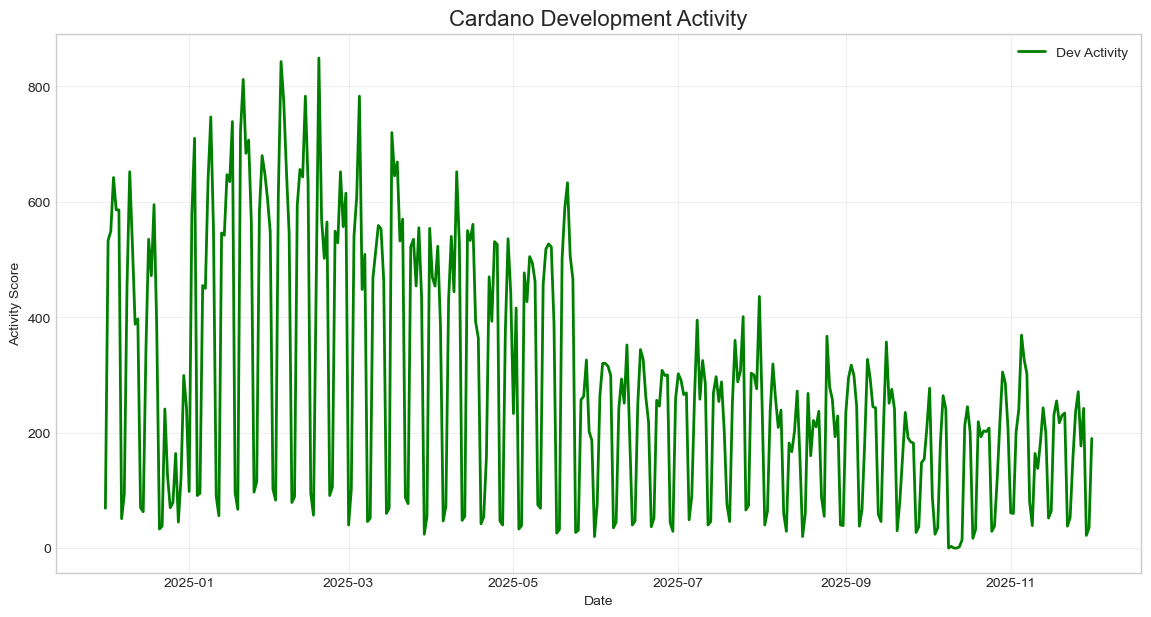

In [22]:
slug_ada = 'cardano'

print(f"Fetching Dev Activity for {slug_ada}...")
df_dev = san.get(
    "dev_activity",
    slug=slug_ada,
    from_date=from_date,
    to_date=to_date,
    interval="1d"
)

plt.figure()
plt.plot(df_dev.index, df_dev.values, color='green', label='Dev Activity', linewidth=2)
plt.title(f'{slug_ada.capitalize()} Development Activity', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Activity Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. Correlation Analysis: Price vs Daily Active Addresses
A common quantitative task is to check correlations between on-chain metrics and price. 
Here we visualize **Bitcoin Price** against **Daily Active Addresses** on a dual-axis chart and calculate the correlation coefficient.

Fetching Price and DAA for Correlation Analysis...

Correlation Coefficient between Price and DAA: -0.0703


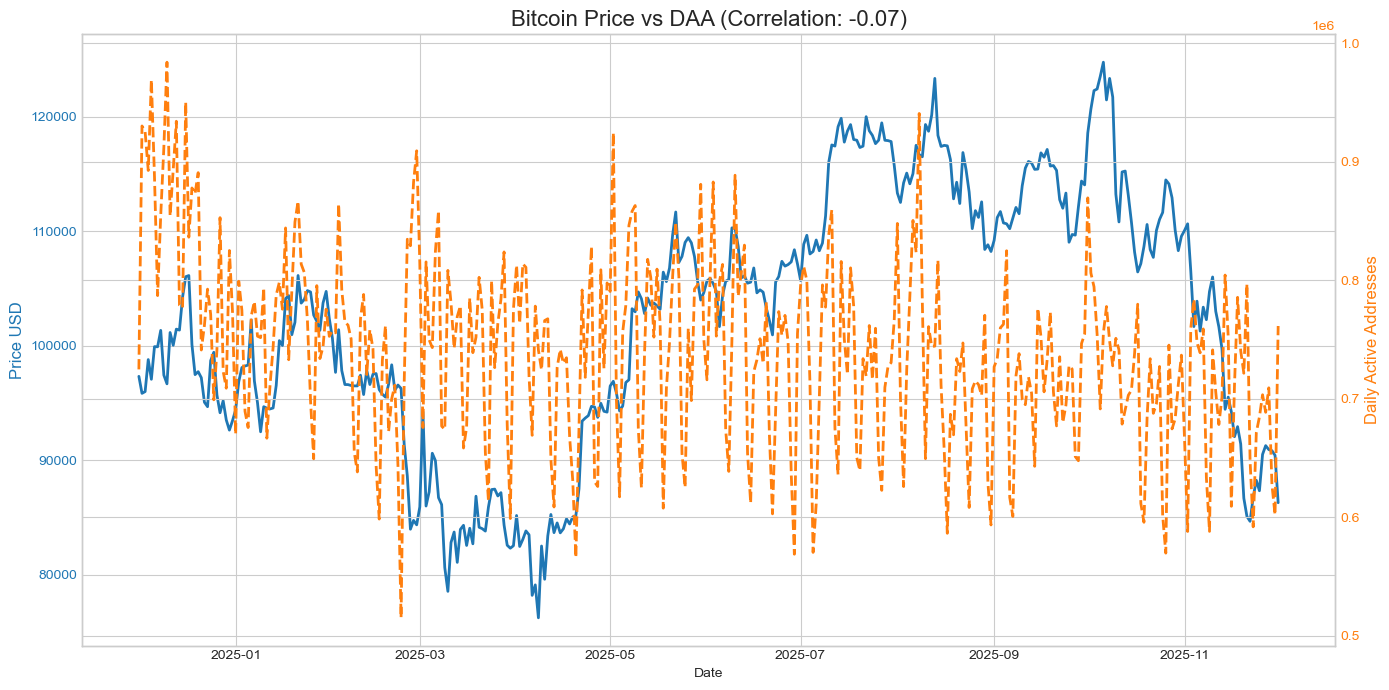

In [23]:
# Fetch Data for Bitcoin
print("Fetching Price and DAA for Correlation Analysis...")
df_btc_price = san.get("price_usd", slug="bitcoin", from_date=from_date, to_date=to_date, interval="1d")
df_btc_daa = san.get("daily_active_addresses", slug="bitcoin", from_date=from_date, to_date=to_date, interval="1d")

# Rename columns for clarity
df_btc_price.columns = ['Price USD']
df_btc_daa.columns = ['DAA']

# Join DataFrames on index (Date)
df_corr = df_btc_price.join(df_btc_daa)

# Calculate Correlation
correlation = df_corr['Price USD'].corr(df_corr['DAA'])
print(f"\nCorrelation Coefficient between Price and DAA: {correlation:.4f}")

# Plot Dual Axis Chart
fig, ax1 = plt.subplots()

color_price = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price USD', color=color_price, fontsize=12)
ax1.plot(df_corr.index, df_corr['Price USD'], color=color_price, linewidth=2, label='Price')
ax1.tick_params(axis='y', labelcolor=color_price)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color_daa = 'tab:orange'
ax2.set_ylabel('Daily Active Addresses', color=color_daa, fontsize=12)
ax2.plot(df_corr.index, df_corr['DAA'], color=color_daa, linestyle='--', linewidth=2, label='DAA')
ax2.tick_params(axis='y', labelcolor=color_daa)

plt.title(f'Bitcoin Price vs DAA (Correlation: {correlation:.2f})', fontsize=16)
fig.tight_layout() 
plt.show()

## Conclusion
This notebook demonstrated the ease of accessing various crypto datasets using `santiment-research-kit`. 
You can explore more metrics using `san.available_metrics()`.